In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\HP\python_datasets\Mall_Customers.csv') 
df.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.shape) 
print(df.isnull().sum()) 

(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
X = df.values[:,[3,4]] 

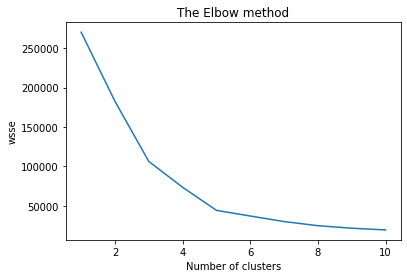

In [5]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wsse = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10) 
    kmeans.fit(X) 
    wsse.append(kmeans.inertia_) 
    
plt.plot(range(1,11), wsse) 
plt.title('The Elbow method') 
plt.xlabel('Number of clusters') 
plt.ylabel('wsse') 
plt.show() 

In [6]:
#fitting kmeans to the dataset
kmeans = KMeans(n_clusters=5, random_state=10) 
Y_pred = kmeans.fit_predict(X) 

In [7]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [8]:
kmeans.n_iter_

3

In [9]:
df["Cluster"] = Y_pred
df.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


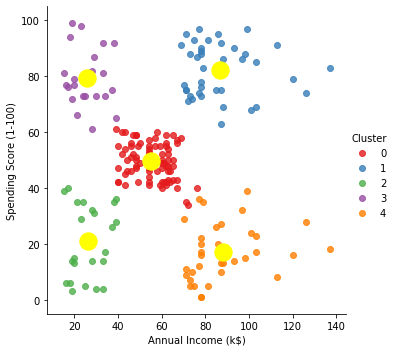

In [10]:
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', fit_reg=False, #No regression line
          hue='Cluster', palette="Set1") 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
              s=300, c='yellow') 

plt.show() 

In [11]:
df['Cluster'] = df['Cluster'].map({0:"Standard", 1:"Target", 2:"Sensible",
                                  3:"Careless", 4:"Careful"}) 
df.head(20) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Sensible
1,2,Male,21,15,81,Careless
2,3,Female,20,16,6,Sensible
3,4,Female,23,16,77,Careless
4,5,Female,31,17,40,Sensible
5,6,Female,22,17,76,Careless
6,7,Female,35,18,6,Sensible
7,8,Female,23,18,94,Careless
8,9,Male,64,19,3,Sensible
9,10,Female,30,19,72,Careless
